In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('cleaned_news_dataset.csv')
df.head()


,text,label
0,north korean troops deploy russias kursk regio...,9.0
1,important issue life itselfunfortunately lot h...,8.0
2,celebrity chef boards uss tripoli judge navys ...,8.0
3,ksrelief provides medical assistance lebanon j...,0.0
4,germany wrestles arms sales israellegal ideolo...,9.0


In [ ]:
texts = df['text'].values
labels = df['label'].values

In [ ]:
# Tokenizer settings
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Tokenize the texts
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Pad sequences to the same length
max_length = 10
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")


In [ ]:
# Convert labels to numpy array
labels = np.array(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [ ]:
# Model parameters
vocab_size = len(word_index) + 1  # Vocabulary size
embedding_dim = 16
num_classes = 10  # Number of classes (update based on your dataset)


In [ ]:
with tf.device('/GPU:0'):  # Force the model to run on GPU
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        GlobalAveragePooling1D(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model on GPU
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=6,
        validation_data=(X_val, y_val),
        batch_size=32
    )

Epoch 1/6
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2868 - loss: 2.1891 - val_accuracy: 0.3816 - val_loss: 1.7149
Epoch 2/6
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3977 - loss: 1.6939 - val_accuracy: 0.4671 - val_loss: 1.6109
Epoch 3/6
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4640 - loss: 1.6120 - val_accuracy: 0.4711 - val_loss: 1.5251
Epoch 4/6
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - loss: 1.3104 - val_accuracy: 0.4658 - val_loss: 1.5407
Epoch 5/6
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5762 - loss: 1.2118 - val_accuracy: 0.4895 - val_loss: 1.5843
Epoch 6/6
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6304 - loss: 1.0567 - val_accuracy: 0.4934 - val_loss: 1.6813


In [ ]:
# Evaluate the model
with tf.device('/GPU:0'):
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {loss}")
    print(f"Validation Accuracy: {accuracy}")

# Evaluate the model on additional metrics
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_classes))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_classes))


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4526 - loss: 1.7289 
Validation Loss: 1.6812881231307983
Validation Accuracy: 0.4934210479259491
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00        42
         4.0       0.27      0.48      0.35        92
         5.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00        22
         7.0       0.00      0.00      0.00        42
         8.0       0.62      0.77      0.69       290
         9.0       0.45      0.52      0.48       208

    accuracy                           0.49       760
   macro avg       0.13      0.18      0.15       760
weighted avg       0.39      0.49      0.44       760


Confusion Matrix:
[[  0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


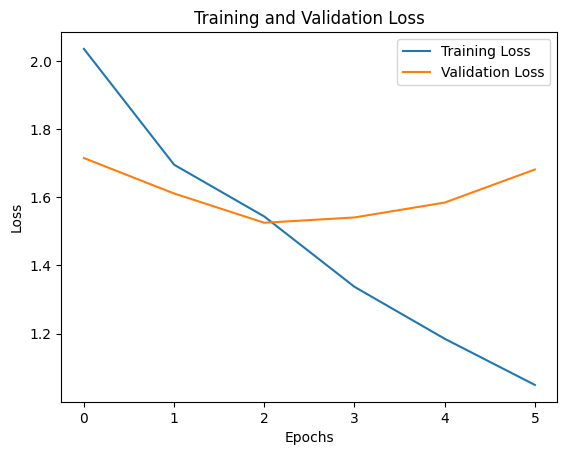

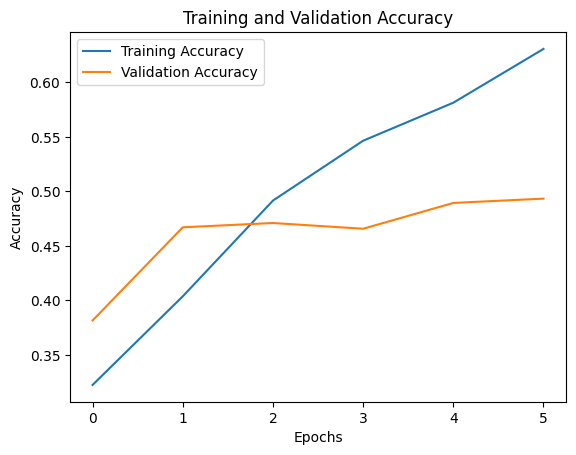

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


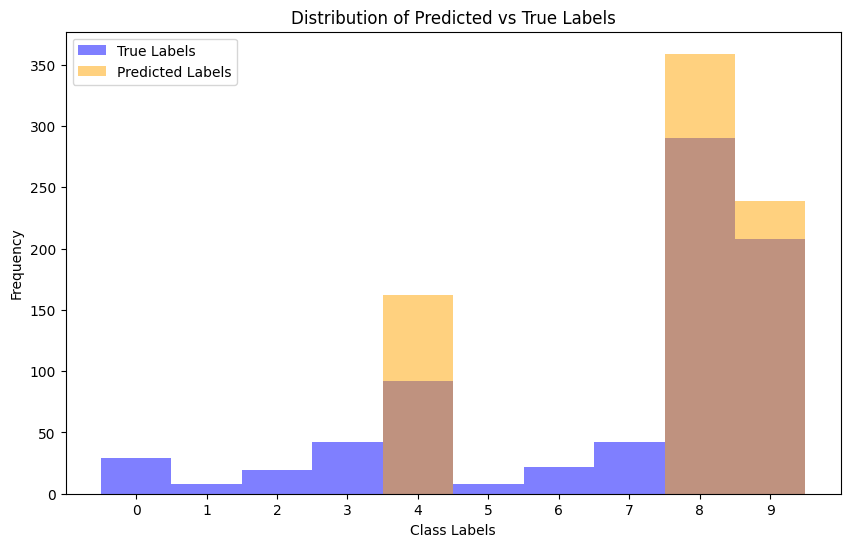

In [ ]:
import matplotlib.pyplot as plt

# Predicted and true labels
y_val_pred_classes = np.argmax(model.predict(X_val), axis=1)

# Plot distributions
plt.figure(figsize=(10, 6))
plt.hist(y_val, bins=np.arange(0, 11) - 0.5, alpha=0.5, label='True Labels', color='blue')
plt.hist(y_val_pred_classes, bins=np.arange(0, 11) - 0.5, alpha=0.5, label='Predicted Labels', color='orange')
plt.xticks(range(10))  # Adjust based on the number of classes
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs True Labels')
plt.legend()
plt.show()


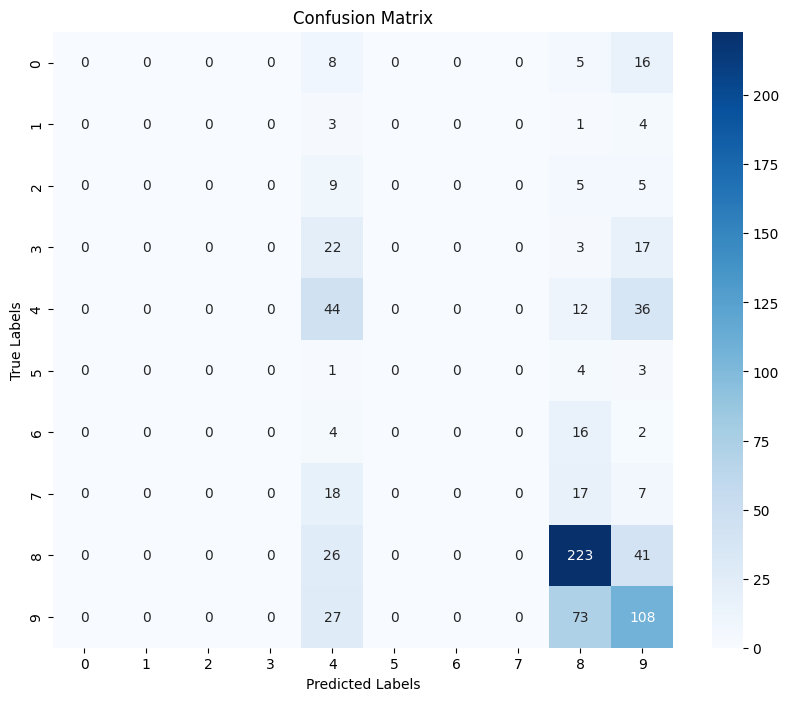

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-19-cd200a82ae11>:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=pd.melt(data, var_name="Type", value_name="Labels"), x="Type", y="Labels", scale="count", inner="quartile")


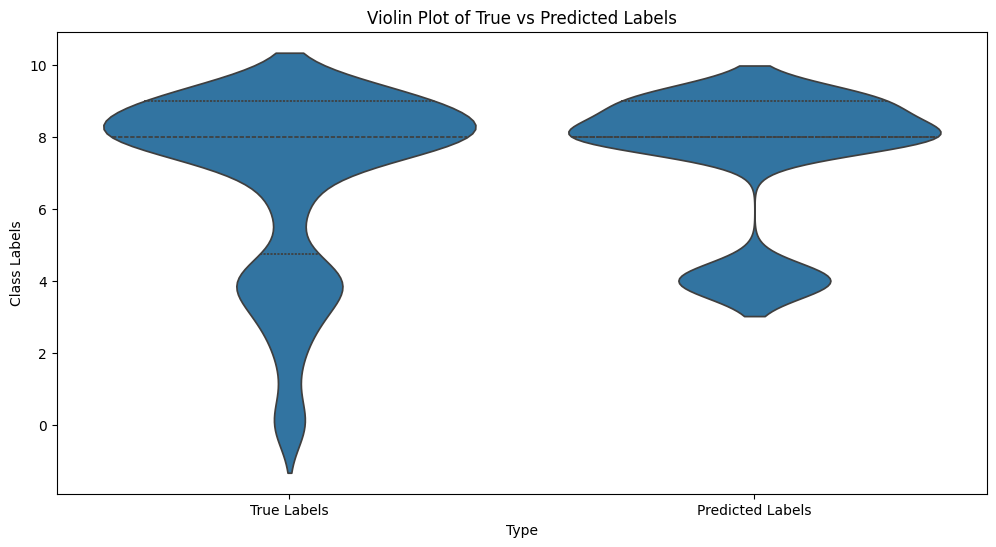

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for the violin plot
y_val_pred_classes = np.argmax(model.predict(X_val), axis=1)

# Combine true and predicted labels into a DataFrame
data = pd.DataFrame({
    "True Labels": y_val,
    "Predicted Labels": y_val_pred_classes
})

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=pd.melt(data, var_name="Type", value_name="Labels"), x="Type", y="Labels", scale="count", inner="quartile")
plt.title("Violin Plot of True vs Predicted Labels")
plt.xlabel("Type")
plt.ylabel("Class Labels")
plt.xticks(ticks=[0, 1], labels=["True Labels", "Predicted Labels"])
plt.show()


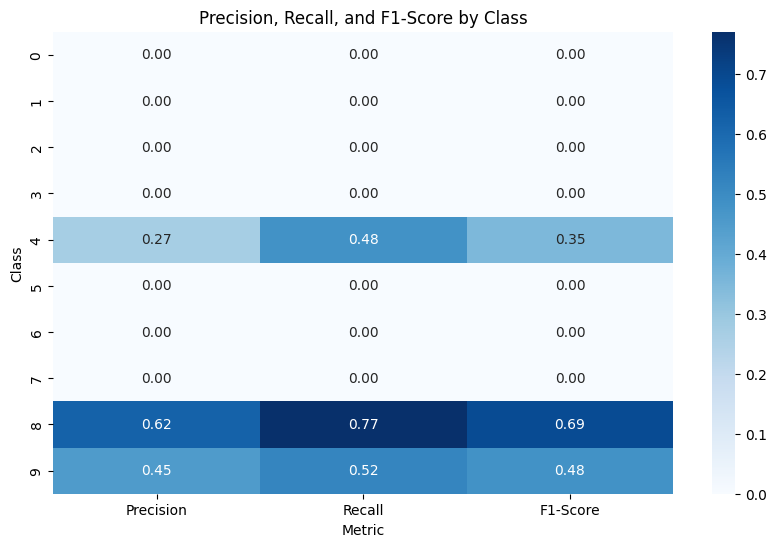

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data from the classification report
data = {
    "Class": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Precision": [0.00, 0.00, 0.00, 0.00, 0.27, 0.00, 0.00, 0.00, 0.62, 0.45],
    "Recall": [0.00, 0.00, 0.00, 0.00, 0.48, 0.00, 0.00, 0.00, 0.77, 0.52],
    "F1-Score": [0.00, 0.00, 0.00, 0.00, 0.35, 0.00, 0.00, 0.00, 0.69, 0.48],
}

df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index("Class"), annot=True, cmap="Blues", cbar=True, fmt=".2f")
plt.title("Precision, Recall, and F1-Score by Class")
plt.xlabel("Metric")
plt.ylabel("Class")
plt.show()


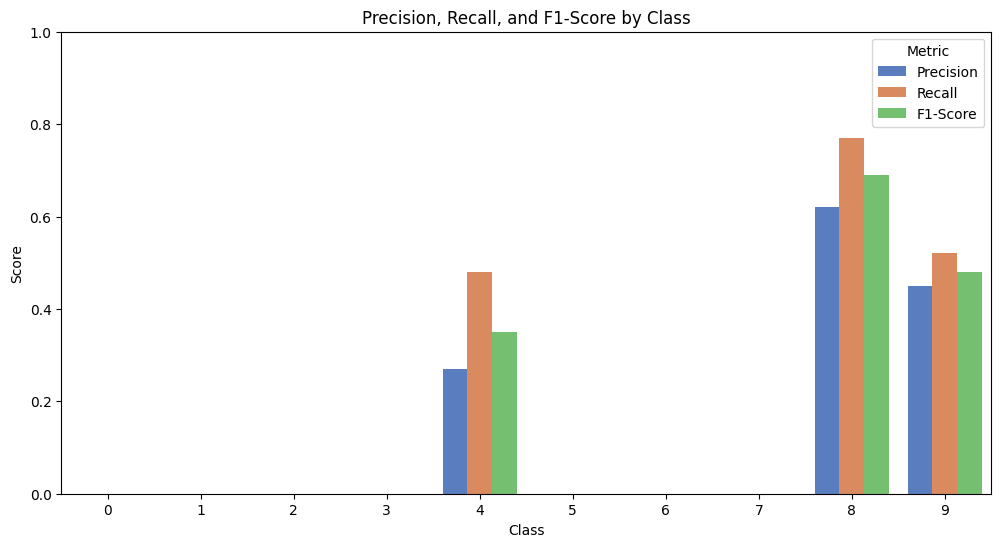

In [ ]:
# Plot bar chart for precision, recall, and F1-score
df_melted = pd.melt(df, id_vars=["Class"], var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Class", y="Score", hue="Metric", palette="muted")
plt.title("Precision, Recall, and F1-Score by Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.show()
